(-5, -5, 250)
(-3.0000000000000027, 3.4000000000000004, 4.393600000000042)
[[ -5.      -5.     250.    ]
 [ -3.       3.4      4.3936]]


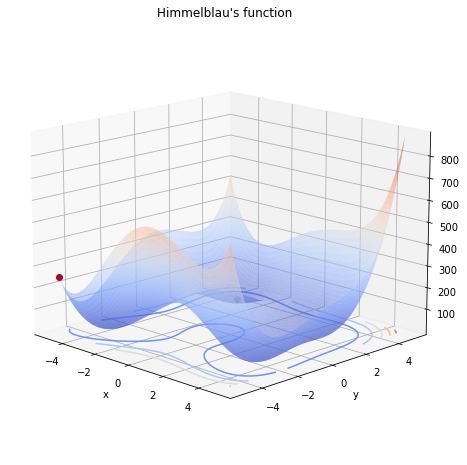

In [1]:
import random
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def cost_function(x, y=0):
    """Himmelblau's function"""
    return ((x**2) + y -11)**2 + (x + (y**2) - 7)**2

INITIAL_STATE = -5 # Initial position
T = 10000 # Temperature
Tmin = 0.0001 # Minimum temperature
STEP = 0.1 # How change variable
COOL = 0.999 # Cooling variable

prev_state = np.array([INITIAL_STATE,INITIAL_STATE])
prev_energy = cost_function(prev_state, 0)
state = np.zeros(2)
while T > Tmin:
    a=0
    #d_state = np.random.randn(2)
    d_state = np.random.beta(1, 1, 2)
    for i in d_state:
        if i > 0.5:
            d_state[a] = STEP
        else:
            d_state[a] = -STEP
        a+=1
    a=0
    state = prev_state + d_state
    energy = cost_function(state) # Calculate cost
    p = np.exp(-np.abs(energy - prev_energy) / T) # Calculate p
    # Update in a case of probability p or smaller energy
    if (energy[0] < prev_energy[0] or random.random() < p[0]):
        if (energy[1] < prev_energy[1] or random.random() < p[1]):
            prev_state = state
            prev_energy = energy
    T = T * COOL


# plot
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y) 
Z = cost_function(X, Y)
plt.title("Himmelblau's function")
plt.xlabel("x")
plt.ylabel("y")
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, rstride=1, cstride=1, alpha=.5)
cset = ax.contour(X, Y, Z, zdir='z', offset=-5, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-5, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=5, cmap=cm.coolwarm)

# Initial end points in 3D space (x,y,z)
mi = (INITIAL_STATE, INITIAL_STATE, cost_function(INITIAL_STATE, INITIAL_STATE))
print(mi)
me = (prev_state[0], prev_state[1], cost_function(prev_state[0], prev_state[1]))
print(me)

#plot points.
res = np.array([mi,me])
print(res)
ax.plot(res[:,0], res[:,1], res[:,2], marker="o", ls="", c=cm.coolwarm(1.))
ax.view_init(azim=-45, elev=15)
plt.show()